<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/maternal-smoking/smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Smoking

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/maternal-smoking/smoking.tsv")
df.shape

(610, 20)

In [3]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


## Q1. Does the mom's smoking pattern affect the newborn birth weight?

### Numerically

Let's first see how many different smoking patterns exist in the dataset. We will use the `groupby` function to group the rows (records) in the `DataFrame` by the `smoke` column (variable). Then count the number of different row per each smoking pattern using the `size` function.

In [4]:
df.groupby('smoke').size()

smoke
never              282
now                216
once_not_now        60
until_pregnancy     52
dtype: int64

From the above, we can see that there are four different smoking patterns, `never` (282 rows), `once_not_now` (60 rows), `until_pregnancy` (52 rows), and `now` (216 rows).

Now, let's look at average baby weights for each of these patterns by grouping them and aggregating them by taking `median` of the `weight`.

In [5]:
df.groupby('smoke').agg(Median_Baby_Weight = ('weight', 'median')).reset_index()

,smoke,Median_Baby_Weight
0,never,123.0
1,now,114.5
2,once_not_now,123.5
3,until_pregnancy,124.5


From the table above, we can see that the moms who smoked during pregnancy (`now`) had babies of the lowest birth weight, average of `114.5`.

### Visually

<Axes: xlabel='smoke', ylabel='weight'>

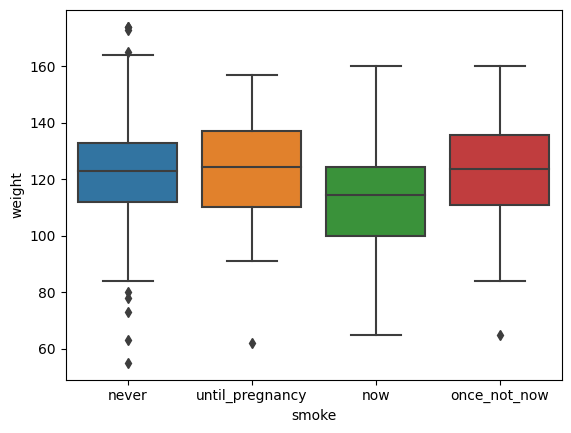

In [6]:
sns.boxplot(data = df, x = 'smoke', y = 'weight')

The effects of maternal smoking on newborn weight are clearly illustrated above.

---

## Q2. Does the mom’s race affect the newborn birth weight?


<Axes: xlabel='mom.race', ylabel='weight'>

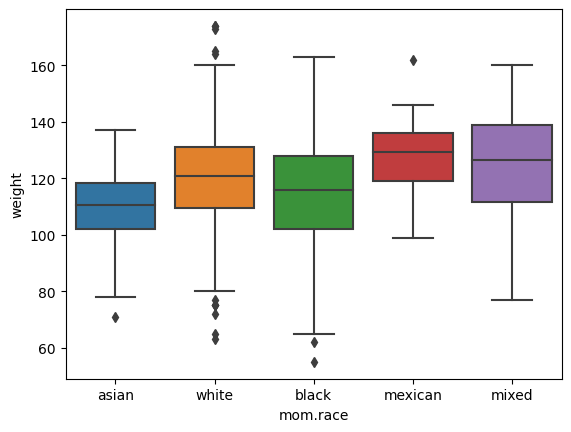

In [7]:
sns.boxplot(data = df, x = 'mom.race', y = 'weight')

<Axes: xlabel='mom.race', ylabel='weight'>

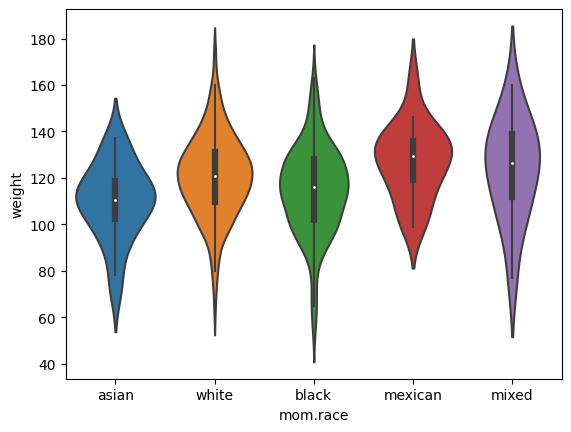

In [8]:
sns.violinplot(data = df, x = 'mom.race', y = 'weight')

## Q3. Is there a correlation between the mom’s weight and the baby’s weight?


<Axes: xlabel='mom.weight', ylabel='weight'>

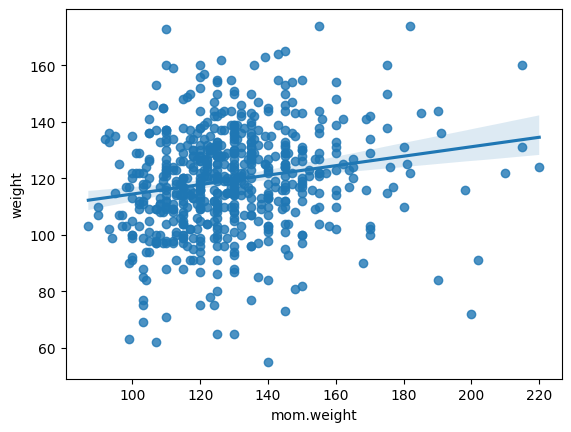

In [9]:
sns.regplot(data = df, x = 'mom.weight', y = 'weight')

## Q4. Is there a correlation between the dad’s weight and the dad's height?

## Q5. From Q3 and Q4, which is a stronger correlation?

## Q6. Is there a correlation between the mom’s weight and the dad’s weight?

## Q7. On average, does the mom’s weight change across the races?

## Q8. Does mom’s smoking pattern change with the mom’s education?

In [10]:
counts = df.groupby(['mom.edu', 'smoke']).size().reset_index(name = 'count')
counts

,mom.edu,smoke,count
0,0,never,1
1,0,once_not_now,1
2,0,until_pregnancy,1
3,1,never,26
4,1,now,46
5,1,once_not_now,6
6,1,until_pregnancy,7
7,2,never,103
8,2,now,90
9,2,once_not_now,14


<Axes: xlabel='mom.edu', ylabel='count'>

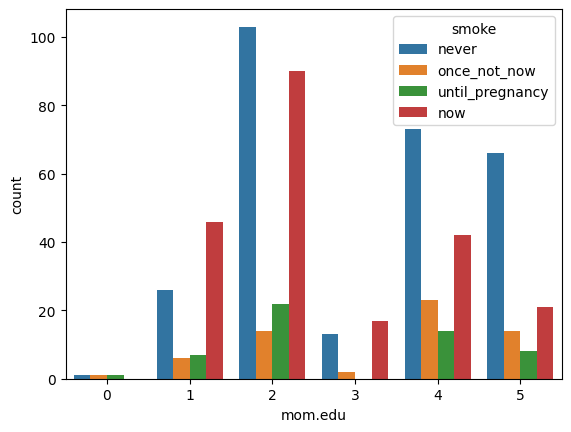

In [11]:
sns.barplot(data = counts, x = "mom.edu", y = 'count', hue = 'smoke')

In [12]:
totals = df.groupby(['mom.edu']).size().reset_index(name = 'total')
totals

,mom.edu,total
0,0,3
1,1,85
2,2,229
3,3,32
4,4,152
5,5,109


In [13]:
merged = counts.merge (totals, on = 'mom.edu')
merged

,mom.edu,smoke,count,total
0,0,never,1,3
1,0,once_not_now,1,3
2,0,until_pregnancy,1,3
3,1,never,26,85
4,1,now,46,85
5,1,once_not_now,6,85
6,1,until_pregnancy,7,85
7,2,never,103,229
8,2,now,90,229
9,2,once_not_now,14,229


In [14]:
normalized = merged.assign(ratio = merged['count'] / merged['total'])
normalized

,mom.edu,smoke,count,total,ratio
0,0,never,1,3,0.333333
1,0,once_not_now,1,3,0.333333
2,0,until_pregnancy,1,3,0.333333
3,1,never,26,85,0.305882
4,1,now,46,85,0.541176
5,1,once_not_now,6,85,0.070588
6,1,until_pregnancy,7,85,0.082353
7,2,never,103,229,0.449782
8,2,now,90,229,0.393013
9,2,once_not_now,14,229,0.061135


<Axes: xlabel='mom.edu', ylabel='ratio'>

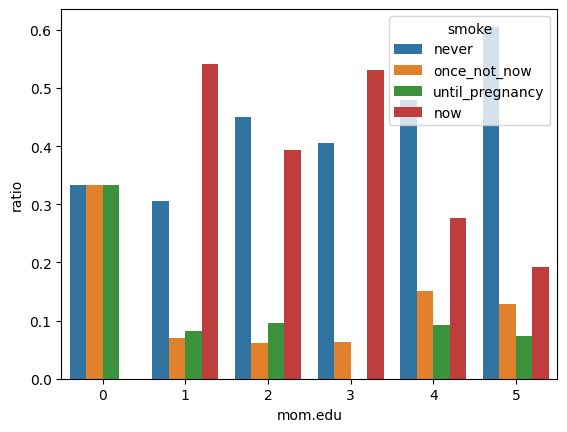

In [15]:
sns.barplot(data = normalized, x = "mom.edu", y = 'ratio', hue = 'smoke')

## Q9. Does mom’s smoking pattern change with the family income?

## Q10. Is there a relationship between the mom’s race and the dad’s race?